# Classification

Classification - Siniflandirma 
// Cevabi evet hayir olan sorular için classification modelleri kullanırız. Bu calismada buyuk bir sirketin calisanlarindan kimlerin isten ayrilacagini tahmin eden model gelistirecegiz.

In [1]:
import pandas as pd

In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


# Read Data

In [3]:
df = pd.read_csv('hr_data.csv')

## Eda - Exploratory data analysis

In [4]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [5]:
df.sample()  # rastgele bir satir getirir

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
64,36,Travel_Rarely,1223,Research & Development,8,3,Technical Degree,1,83,3,Female,59,3,3,Healthcare Representative,3,3,10096.0,8202,1,Y,No,13,3,2,80,3,17,2,3,17,14,12,8,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

<Axes: xlabel='Attrition', ylabel='count'>

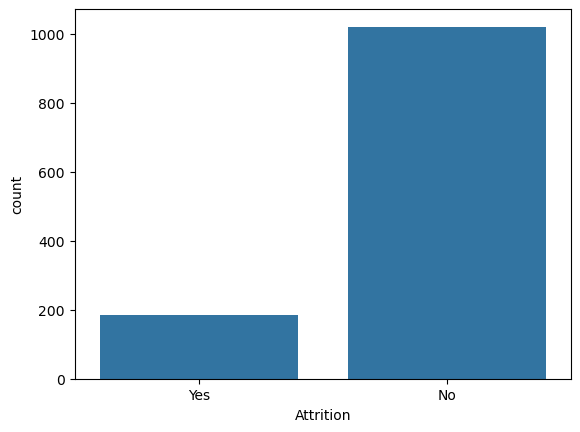

In [7]:
sns.countplot(x = df['Attrition'])

In [8]:
d ={'No': 0 , 'Yes':1} 

In [9]:
df['Attrition'] = df['Attrition'].map(d) ## for yerine degerleri degistirmek icin kullanilir.

<Axes: xlabel='Attrition', ylabel='count'>

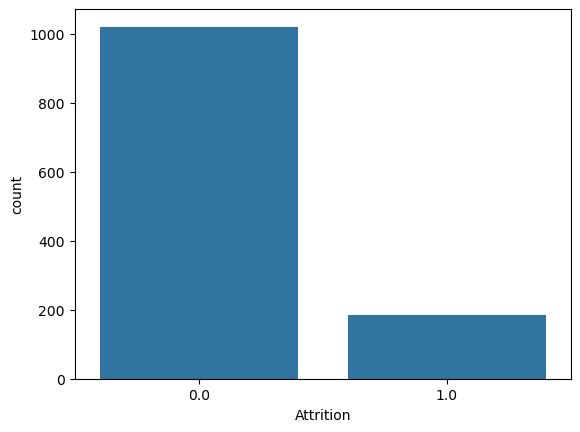

In [10]:
sns.countplot(x = df['Attrition'])

In [11]:
df['Attrition'].value_counts() 

Attrition
0.0    1020
1.0     185
Name: count, dtype: int64

In [12]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [13]:
bos = df[df['Attrition'].isnull()]
dolu = df[df['Attrition'].notnull()]

In [14]:
bos.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,NaN
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,NaN
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,NaN
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,NaN
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,NaN


In [15]:
dolu.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0


In [16]:
x = dolu.drop('Attrition' , axis = 1)
y = dolu[['Attrition']]

In [17]:
x = pd.get_dummies(x , drop_first = True)

In [18]:
# Model Train

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [21]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB

In [22]:
g = GaussianNB()

In [23]:
b = BernoulliNB()

In [24]:
g.fit(x_train, y_train)

GaussianNB()

In [25]:
b.fit(x_train, y_train)

BernoulliNB()

In [26]:
gtahmin = g.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report

In [28]:
accuracy_score(y_test , gtahmin)

0.7883817427385892

In [29]:
btahmin = b.predict(x_test)

In [30]:
accuracy_score(y_test , btahmin)

0.8257261410788381

In [31]:
confusion_matrix(y_test , btahmin)

array([[192,  19],
       [ 23,   7]])

In [32]:
confusion_matrix(y_test , gtahmin)

array([[171,  40],
       [ 11,  19]])

<Axes: >

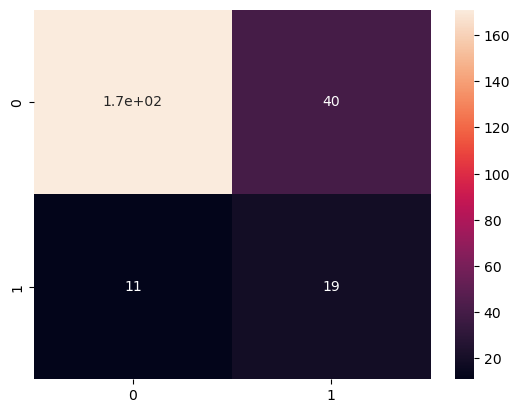

In [33]:
sns.heatmap(confusion_matrix(y_test , gtahmin), annot = True)

In [34]:
print(classification_report(y_test , gtahmin))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       211
         1.0       0.32      0.63      0.43        30

    accuracy                           0.79       241
   macro avg       0.63      0.72      0.65       241
weighted avg       0.86      0.79      0.82       241



### ****Regression da r2 kullanılır , classification da accuracy kullanılır****

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
L = LogisticRegression()

In [37]:
L.fit(x_train , y_train)

LogisticRegression()

In [38]:
Ltahmin = L.predict(x_test)

In [39]:
accuracy_score(y_test , Ltahmin)

0.8672199170124482

<Axes: >

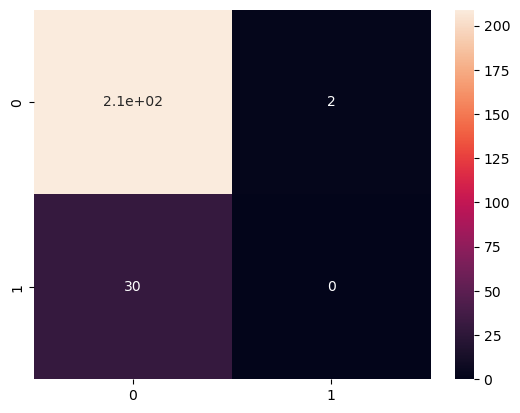

In [40]:
sns.heatmap(confusion_matrix(y_test , Ltahmin), annot = True)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
d = DecisionTreeClassifier()

In [43]:
d.fit(x_train , y_train)

DecisionTreeClassifier()

In [44]:
dtahmin = d.predict(x_test)

In [45]:
accuracy_score(y_test , dtahmin)

0.7925311203319502

<Axes: >

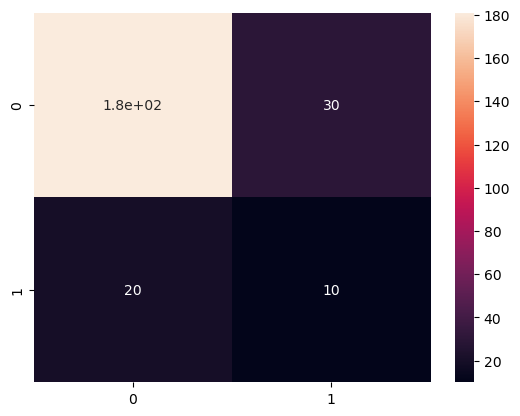

In [46]:
sns.heatmap(confusion_matrix(y_test , dtahmin), annot = True)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
h = GradientBoostingClassifier()

In [50]:
h.fit(x_train , y_train)

GradientBoostingClassifier()

In [52]:
htahmin =  h.predict(x_test)

In [53]:
accuracy_score(y_test , htahmin)

0.8879668049792531

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [55]:
algo_test(x , y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[290  27]
 [ 31  14]]
LogisticRegression()  modeli eğitiliyor!..
[[314   3]
 [ 44   1]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[278  39]
 [ 30  15]]
RandomForestClassifier()  modeli eğitiliyor!..
[[315   2]
 [ 40   5]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[312   5]
 [ 36   9]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[306  11]
 [ 45   0]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[306  11]
 [ 30  15]]
MultinomialNB()  modeli eğitiliyor!..
[[164 153]
 [ 15  30]]
Eğitim tamamlandı.
En başarılı model:  AdaBoostClassifier
Confusion Matrix:
[[306  11]
 [ 30  15]]
classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       317
         1.0       0.58      0.33      0.42        45

    accuracy                           0.89       362
   macro avg       0.74      0.65      0.68       362
weighted avg       0.87      0.89      

,Accuracy,Precision,Recall,F1
AdaBoostClassifier,0.886740,0.886740,0.886740,0.886740
GradientBoostingClassifier,0.886740,0.886740,0.886740,0.886740
RandomForestClassifier,0.883978,0.883978,0.883978,0.883978
LogisticRegression,0.870166,0.870166,0.870166,0.870166
KNeighborsClassifier,0.845304,0.845304,0.845304,0.845304
BernoulliNB,0.839779,0.839779,0.839779,0.839779
DecisionTreeClassifier,0.809392,0.809392,0.809392,0.809392
MultinomialNB,0.535912,0.535912,0.535912,0.535912
